In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0, '..')
import constant
from qoop.core import optimizer_pennylane
import pennylane as qml
%load_ext autoreload
%autoreload 2

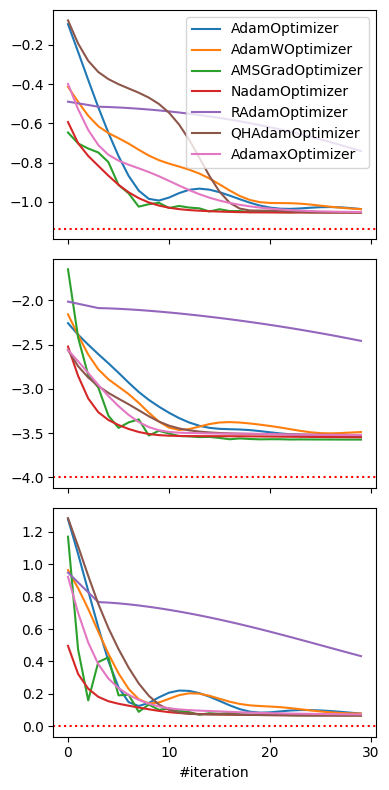

In [10]:

optimizers = [qml.AdamOptimizer, 
             optimizer_pennylane.AdamWOptimizer,
             optimizer_pennylane.AMSGradOptimizer,
             optimizer_pennylane.NadamOptimizer,
             optimizer_pennylane.RAdamOptimizer,
             optimizer_pennylane.QHAdamOptimizer,
             optimizer_pennylane.AdamaxOptimizer]


problems = [
    'VQE',
    'QAOA',
    'Dynamic simulation'
]

t = 0
fig, ax = plt.subplots(3,1, figsize=(4, 8))
for j, optimizer in enumerate(optimizers):
    for i, problem in enumerate(problems):
        if problem == 'VQE':
            loss = np.loadtxt(f'../data/loss_noise/lossvqe_3qubit_2layer_{optimizer.__name__}_stepsize0.1.txt')
        if problem == 'QAOA':
            loss = np.loadtxt(f'../data/loss_noise/lossqaoa_4qubit_2layer_{optimizer.__name__}_stepsize0.1.txt')
        if problem == 'Dynamic simulation':
            loss = np.loadtxt(f'../data/loss_noise/lossdynamic_3qubit_2layer_{optimizer.__name__}_t1_noise.txt') 
        ax[i].plot(loss[:30], label=optimizer.__name__)
        ax[i].set_xticks([0, 10, 20, 30])
        ax[i].set_xticklabels([])
ax[2].set_xlabel('#iteration')
ax[2].set_xticklabels([0, 10, 20, 30])
ax[0].axhline(y=-1.136, color='red', linestyle=':')
ax[1].axhline(y=-4, color='red', linestyle=':')
ax[2].axhline(y=0, color='red', linestyle=':')
ax[0].legend()
plt.tight_layout()
plt.savefig('../data/images/loss_noise_3_problem_temp.svg')